# Imports

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random

from tsne_modifications.dataset_genetarions.synthesize import synthesize

ImportError: cannot import name 'synthesize' from 'tsne_modifications.dataset_genetarions.jedi_dataset' (c:\edu\ml\tsne\tsne_modifications\dataset_genetarions\jedi_dataset.py)

In [9]:
# Set random seed for reproducibility
np.random.seed(42)

## Creation of Synthetic datasets

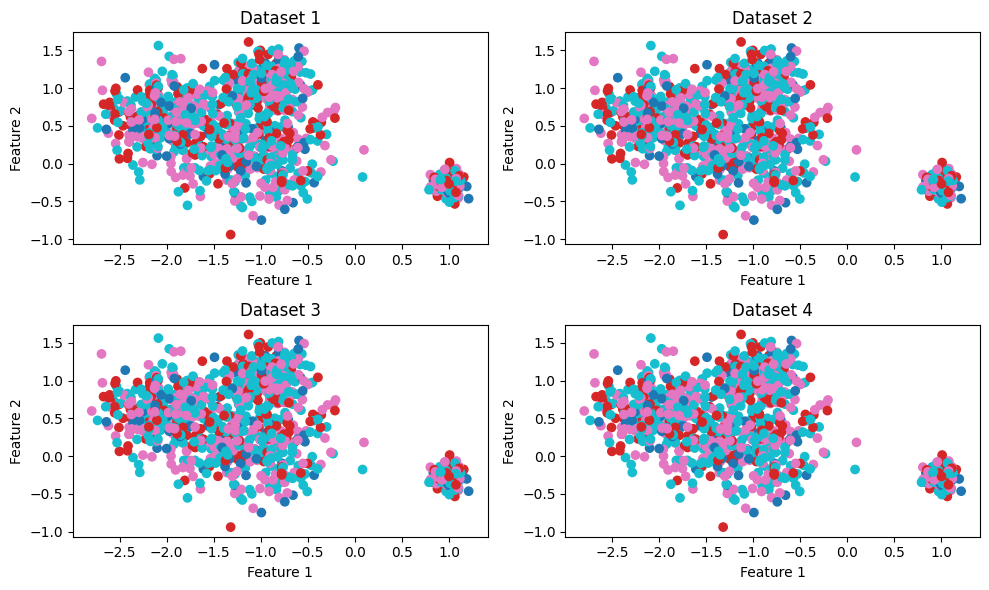

In [13]:

size = 1000
X_1, y_1 = synthesize(size, random.randint(1000))
X_2, y_2 = synthesize(size, random.randint(1000))
X_3, y_3 = synthesize(size, random.randint(1000))
X_4, y_4 = synthesize(size, random.randint(1000))

# Plot the datasets on different subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
axs = axs.flatten()

for i, (X, y) in enumerate([(X_1, y_1), (X_2, y_2), (X_3, y_3), (X_4, y_4)]):
    ax = axs[i]
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10')
    ax.set_title(f'Dataset {i+1}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()